## Index construction, 
## portofolio optimization 
## Risk factor model with PCA (principal component analysis)
### Value weighted index

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimization
plt.style.use('seaborn')
import seaborn as sns

In [2]:
# define that float objects should have two decimals
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams ['figure.figsize'] = (12, 8)
sns.set()

In [3]:
data = pd.read_csv("index_stocks.csv", header=[0, 1], parse_dates=[0], index_col=[0])
data.head()

Adj Close                                  Close               \
                AMZN     BA   DIS    IBM    KO  MSFT   AMZN     BA   DIS   
Date                                                                       
2013-12-31    398.79 116.65 70.31 126.47 31.70 32.01 398.79 136.49 76.40   
2014-01-02    397.97 116.81 70.19 125.10 31.20 31.80 397.97 136.67 76.27   
2014-01-03    396.44 117.62 70.05 125.84 31.05 31.58 396.44 137.62 76.11   
2014-01-06    393.63 118.30 69.78 125.41 30.90 30.92 393.63 138.41 75.82   
2014-01-07    398.03 120.09 70.26 127.91 30.99 31.16 398.03 140.51 76.34   

                   ...  Open                      Volume                    \
              IBM  ...   DIS    IBM    KO  MSFT     AMZN       BA      DIS   
Date               ...                                                       
2013-12-31 179.32  ... 76.28 178.29 41.13 37.40  1996500  2096000  4692300   
2014-01-02 177.37  ... 76.04 178.98 41.12 37.35  2137800  3366700  5200900   
2014-01-03 178.43  ... 76.30 177.66 40.68 37.20  2210200  3177400  4060700   
2014-01-06 177.82  ... 76.53 178.92 40.48 36.85  3170600  4196500  6816200   
2014-01-07 181.37  ... 76.12 178.19 40.48 36.33  1916000  4238500  4494900   

                                         
                IBM        KO      MSFT  
Date                                     
2013-12-31  3786206  11729200  17503500  
2014-01-02  4755639  12698600  30632200  
2014-01-03  4250107  10403400  31134800  
2014-01-06  4254919  11036300  43603700  
2014-01-07  6205186  11872300  35802800  

[5 rows x 36 columns]

In [4]:
close = data["Adj Close"]
close.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,398.79,116.65,70.31,126.47,31.70,32.01
2014-01-02,397.97,116.81,70.19,125.10,31.20,31.80
2014-01-03,396.44,117.62,70.05,125.84,31.05,31.58
2014-01-06,393.63,118.30,69.78,125.41,30.90,30.92
2014-01-07,398.03,120.09,70.26,127.91,30.99,31.16


In [5]:
norm = close.div(close.iloc[0]).mul(100)
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,99.79,100.13,99.83,98.91,98.43,99.33
2014-01-03,99.41,100.83,99.62,99.50,97.94,98.66
2014-01-06,98.71,101.41,99.24,99.16,97.48,96.58
2014-01-07,99.81,102.95,99.92,101.14,97.77,97.33


In [6]:
listings = pd.read_csv("listings_clean.csv")
listings.set_index("Symbol", inplace=True)
listings.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services


In [7]:
mcap = listings.loc[['AMZN', 'BA', 'DIS', 'IBM', 'KO', 'MSFT'], ["Last_Price", "Market_Cap"]]
mcap

,Last_Price,Market_Cap
Symbol,,
AMZN,1847.33,907413834783.70
BA,364.94,206002047212.28
DIS,117.16,210609322989.68
IBM,143.02,127268671933.12
KO,46.64,199393520886.56
MSFT,120.19,922123334074.74


In [8]:
mcap["Shares"] = mcap.Market_Cap.div(mcap.Last_Price, axis=0)
mcap

,Last_Price,Market_Cap,Shares
Symbol,,,
AMZN,1847.33,907413834783.70,491202890.00
BA,364.94,206002047212.28,564481962.00
DIS,117.16,210609322989.68,1797621398.00
IBM,143.02,127268671933.12,889866256.00
KO,46.64,199393520886.56,4275161254.00
MSFT,120.19,922123334074.74,7672213446.00


In [9]:
vwi_val = close.mul(mcap.Shares, axis="columns").div(close.mul(mcap.Shares, axis="columns").sum(axis="columns"), axis=0)
vwi_val 

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,0.22,0.07,0.14,0.13,0.15,0.28
2014-01-02,0.22,0.08,0.14,0.13,0.15,0.28
2014-01-03,0.22,0.08,0.14,0.13,0.15,0.28
2014-01-06,0.22,0.08,0.14,0.13,0.15,0.27
2014-01-07,0.22,0.08,0.14,0.13,0.15,0.27
...,...,...,...,...,...,...
2018-12-21,0.34,0.08,0.09,0.04,0.09,0.36
2018-12-24,0.34,0.08,0.09,0.04,0.09,0.36
2018-12-26,0.35,0.08,0.09,0.04,0.09,0.36


In [10]:
ret = close.pct_change().dropna()
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,-0.00,0.00,-0.00,-0.01,-0.02,-0.01
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02


In [11]:
# build the value weighted index
index_pwi = ret.mul(vwi_val.shift().dropna()).sum(axis=1).add(1).cumprod().mul(100)
index_pwi

Date
2014-01-02    99.37
2014-01-03    99.12
2014-01-06    98.26
2014-01-07    99.23
2014-01-08    98.48
              ...  
2018-12-21   229.01
2018-12-24   221.29
2018-12-26   236.84
2018-12-27   237.64
2018-12-28   237.79
Length: 1257, dtype: float64

In [12]:
norm["VWI"] = 100
norm

,AMZN,BA,DIS,IBM,KO,MSFT,VWI
Date,,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100
2014-01-02,99.79,100.13,99.83,98.91,98.43,99.33,100
2014-01-03,99.41,100.83,99.62,99.50,97.94,98.66,100
2014-01-06,98.71,101.41,99.24,99.16,97.48,96.58,100
2014-01-07,99.81,102.95,99.92,101.14,97.77,97.33,100
...,...,...,...,...,...,...,...
2018-12-21,345.41,253.68,146.44,71.09,135.31,296.11,100
2018-12-24,337.01,245.03,141.00,68.93,130.73,283.75,100
2018-12-26,368.84,261.50,148.70,71.38,133.52,303.13,100


In [13]:
norm.iloc[1:, -1] = index_pwi
norm

,AMZN,BA,DIS,IBM,KO,MSFT,VWI
Date,,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,99.79,100.13,99.83,98.91,98.43,99.33,99.37
2014-01-03,99.41,100.83,99.62,99.50,97.94,98.66,99.12
2014-01-06,98.71,101.41,99.24,99.16,97.48,96.58,98.26
2014-01-07,99.81,102.95,99.92,101.14,97.77,97.33,99.23
...,...,...,...,...,...,...,...
2018-12-21,345.41,253.68,146.44,71.09,135.31,296.11,229.01
2018-12-24,337.01,245.03,141.00,68.93,130.73,283.75,221.29
2018-12-26,368.84,261.50,148.70,71.38,133.52,303.13,236.84


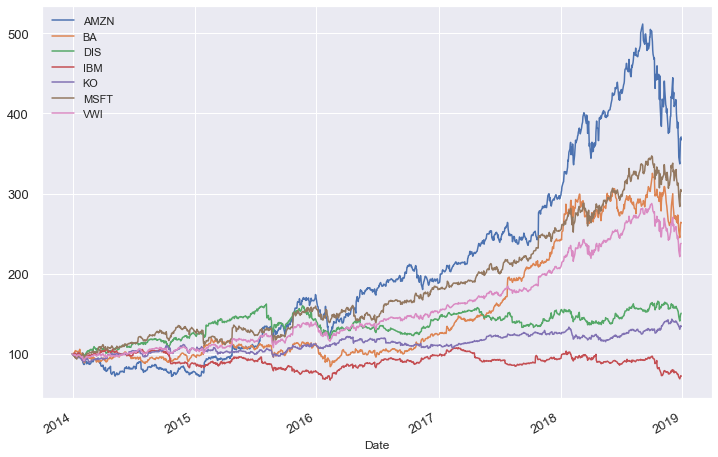

In [14]:
norm.plot(figsize=(12, 8), fontsize=13)
plt.show()

# Portofolio optimization with python Scipy


In [15]:
close.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,398.79,116.65,70.31,126.47,31.70,32.01
2014-01-02,397.97,116.81,70.19,125.10,31.20,31.80
2014-01-03,396.44,117.62,70.05,125.84,31.05,31.58
2014-01-06,393.63,118.30,69.78,125.41,30.90,30.92
2014-01-07,398.03,120.09,70.26,127.91,30.99,31.16


In [16]:
retrn = close.pct_change().dropna()
retrn.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,-0.00,0.00,-0.00,-0.01,-0.02,-0.01
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02


In [17]:
pd.options.display.float_format = '{:.2}'.format
np.set_printoptions(suppress=True, precision=2)

In [18]:
# returns of portofolios
def port_ret(weights):
    return retrn.dot(weights.T).mean(axis=0)*252

In [19]:
# volatility: standard deviation
def port_vol(weights):
    return retrn.dot(weights.T).std(axis=0)*np.sqrt(252)

In [20]:
# risk free return
rf = 0.007

In [21]:
# define the function to minimize 
def fun_to_minimize(weights):
    return (rf - port_ret(weights))/port_vol(weights)

In [22]:
def optimize_portofolio(noa):
    # build the constraints: sum of weights = 1
    # noa = number of assets
    
    assert (noa>=2), "Number of assets should be greater or equal to 2!"
    constraints = ({'type':'eq', 'fun': lambda x: np.sum(x)-1})
    bounds = tuple((0, 1) for _ in range(noa))
    ww = np.full(noa, 1/noa)
    return optimization.minimize(fun=fun_to_minimize, x0=ww, 
                                method='SLSQP', bounds=bounds, constraints=constraints)

In [23]:
opts = optimize_portofolio(len(close.columns))
optimal_weights = opts["x"]

In [24]:
print("optimal weights: {}".format(optimal_weights))

optimal weights: [0.25 0.35 0.   0.   0.   0.4 ]


In [25]:
print("Optimal return: {:.1f}%".format(port_ret(optimal_weights)*100))

Optimal return: 25.5%


In [26]:
print("Optimal Risk: {:.1f}".format(port_vol(optimal_weights)*100))

Optimal Risk: 19.9


In [27]:
print("Sharpe ratio: {:.2f}".format(-fun_to_minimize(optimal_weights)))

Sharpe ratio: 1.24


# Portofolio optimization with CVXPY
This is to compare two optimization approaches

In [28]:
import cvxpy as cvx

In [29]:
pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(suppress = True, precision=2)

In [30]:
def optimize_portofolios(means, cov, risk_aversion):
    
    weights = cvx.Variable(len(means))
    constraints = [sum(weights)==1, # fully invested portofolio
                  weights>=0, # long-only portofolio
                  ]
    expected_ret = means@weights.T 
    expected_vol = cvx.quad_form(weights, cov)
    utility = - expected_ret + risk_aversion*expected_vol
    objective = cvx.Minimize(utility)
    problem = cvx.Problem(objective, constraints)
    
    problem.solve()
    
    return weights.value, expected_ret.value*252, np.sqrt(expected_vol.value*252)

means = np.array(retrn.mean(axis=0))
cov = np.array(retrn.cov())
opt_weights,ex_ret, ex_var  = optimize_portofolios(means, cov, 2.0)
print(opt_weights)
print(ex_ret)
print(ex_var)

[ 0.35  0.28 -0.    0.   -0.    0.37]
0.2624686458336308
0.20700545419039657


In [31]:
def efficient_frontier(means, cov, min_aversion=1.0, max_aversion=115.5, nsamples=250):
    """plot the efficient frontier of the portfolio.
    """
    samples = np.linspace(min_aversion, max_aversion, nsamples)
    portfolios = []
    returns = []
    variances = []
    
    for aversion in samples:
        weights, rets, var = optimize_portofolios(means, cov, aversion)
        portfolios.append(weights)
        returns.append(rets)
        variances.append(var)
        
    plt.plot(variances, returns, c="k", linewidth=2.5)
    plt.xlabel("Risks", fontsize=13)
    plt.ylabel("Returns", fontsize=13)
    

In [32]:
# pd.Series to store the optimal weights
opt_weights_df = pd.DataFrame(data = opt_weights, index=close.columns)
opt_weights_df.columns = ["opt_weights"]
opt_weights_df

,opt_weights
AMZN,0.35
BA,0.28
DIS,-0.00
IBM,0.00
KO,-0.00
MSFT,0.37


In [33]:
def annualiazed_risk_return(df):
    riskret = df.agg(["mean", "std"]).T
    riskret.columns= ["Return", "Risk"]
    riskret["Return"] = riskret["Return"]*252
    riskret["Risk"] = riskret["Risk"]*np.sqrt(252)
    #riskret.columns = ["Return", "Risk"]
    
    return riskret

In [34]:
# Build the optimal portfolio 
ret["MP"] = ret.dot(opt_weights)
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-02,-0.00,0.00,-0.00,-0.01,-0.02,-0.01,-0.00
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01,-0.00
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02,-0.01
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.00


In [35]:
stock_summary = annualiazed_risk_return(ret)
stock_summary

,Return,Risk
AMZN,0.31,0.31
BA,0.22,0.23
DIS,0.10,0.19
IBM,-0.04,0.20
KO,0.07,0.14
MSFT,0.25,0.23
MP,0.26,0.21


In [36]:
# Sharpe Ratio -- choose the risk free rate to be 1 basis point
rf = .0001
stock_summary["Sharpe"] = (stock_summary.Return.sub(rf)).div(stock_summary.Risk)

stock_summary

,Return,Risk,Sharpe
AMZN,0.31,0.31,1.00
BA,0.22,0.23,0.95
DIS,0.10,0.19,0.53
IBM,-0.04,0.20,-0.22
KO,0.07,0.14,0.50
MSFT,0.25,0.23,1.07
MP,0.26,0.21,1.27


# Generate portofolios
## Efficient frontier -- visualization
## Market portofolio -- visualization

In [37]:
no_pflio = 10000
weights_pf = np.random.random(no_pflio*len(close.columns)).reshape(no_pflio, len(close.columns))
weights_pf /= weights_pf.sum(axis=1, keepdims=True)
#weights_pf.sum(axis=1)

In [38]:
weights_pf

array([[0.24, 0.13, 0.24, 0.02, 0.37, 0.  ],
       [0.08, 0.07, 0.11, 0.28, 0.27, 0.19],
       [0.24, 0.21, 0.04, 0.27, 0.22, 0.02],
       ...,
       [0.19, 0.11, 0.1 , 0.17, 0.22, 0.22],
       [0.07, 0.08, 0.16, 0.24, 0.22, 0.23],
       [0.1 , 0.07, 0.17, 0.17, 0.16, 0.33]])

In [39]:
# build the portofolos
p_returns = ret.iloc[:, :-1].dot(weights_pf.T)
p_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01
2014-01-03,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,...,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
2014-01-06,-0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,-0.01,-0.00,-0.00,...,-0.01,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,-0.01,-0.01
2014-01-07,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2014-01-08,-0.01,-0.01,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,...,-0.00,-0.01,-0.00,-0.01,-0.01,-0.00,-0.00,-0.01,-0.01,-0.01


In [40]:
riskret = annualiazed_risk_return(p_returns)
riskret.head()

,Return,Risk
0,0.15,0.14
1,0.11,0.14
2,0.13,0.16
3,0.18,0.17
4,0.14,0.14


In [41]:
# sharpe reatios of the portfolios
riskret["Sharpe"] = (riskret.Return.sub(rf)).div(riskret.Risk)
riskret.head()

,Return,Risk,Sharpe
0,0.15,0.14,1.06
1,0.11,0.14,0.75
2,0.13,0.16,0.85
3,0.18,0.17,1.04
4,0.14,0.14,1.02


In [42]:
# return of the optimal portofolio
optimal_portfolio_return = pd.DataFrame(data= ret.iloc[:,:-1].dot(opt_weights), columns= ["Returns"])

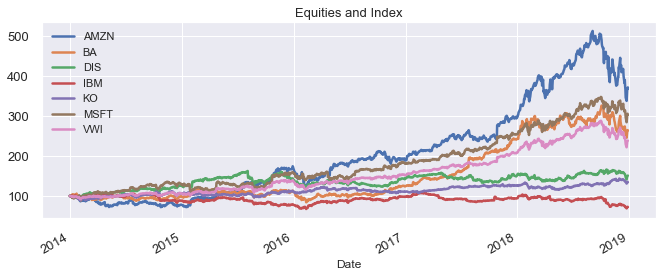

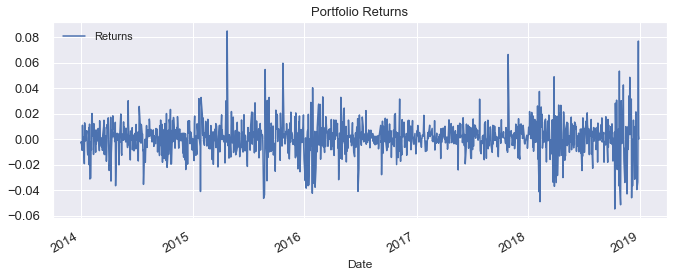

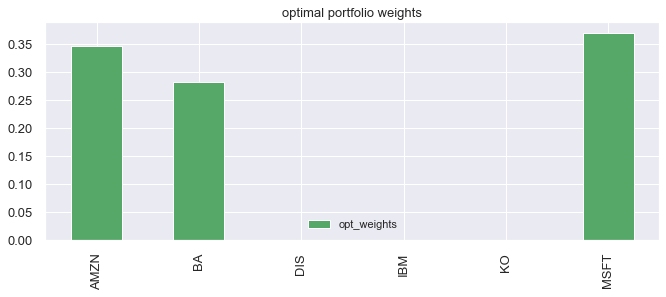

In [43]:
# plot the stocks, the index, and the bar plot of the optimal weights
norm.plot(figsize=(11, 4), fontsize=13, linewidth=2.5)
plt.title("Equities and Index", fontsize=13)
optimal_portfolio_return.plot(fontsize=13, figsize=(11, 4)) 
plt.title("Portfolio Returns", fontsize=13)
opt_weights_df.plot.bar(fontsize=13, figsize=(11, 4), color='g')
plt.title("optimal portfolio weights", fontsize=13)
plt.show()

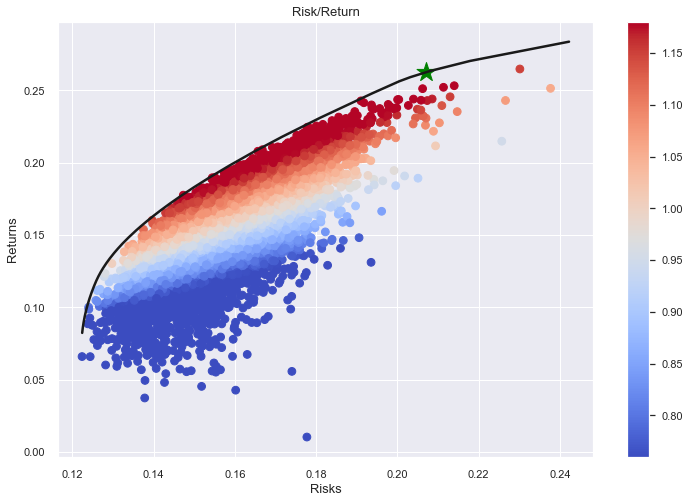

In [44]:
#plt.figure(figsize=(11, 6))
plt.scatter(riskret.loc[:, "Risk"], riskret.loc[:, "Return"], s=60, c=riskret.loc[:, "Sharpe"], cmap="coolwarm", 
           vmin=0.76, vmax=1.18)
plt.colorbar()
#plt.scatter(stock_summary.loc[:, "Risk"], stock_summary.loc[:, "Return"], c="black")
plt.scatter(stock_summary.loc["MP", "Risk"], stock_summary.loc["MP", "Return"], s = 400, marker = "*", c="green")
plt.xlabel("ann. Risk(std)", fontsize=13)
plt.ylabel("ann. Return", fontsize=13)
plt.title("Risk/Return", fontsize=13)
#plt.show()
cov = np.array(retrn.cov())
plt.show(efficient_frontier(means, cov))
plt.show()

#                Risk factor model with PCA

In [45]:
data = pd.read_csv('index_stocks.csv', header=[0, 1], parse_dates=[0], index_col=0)
stocks = data["Adj Close"]
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,398.79,116.65,70.31,126.47,31.70,32.01
2014-01-02,397.97,116.81,70.19,125.10,31.20,31.80
2014-01-03,396.44,117.62,70.05,125.84,31.05,31.58
2014-01-06,393.63,118.30,69.78,125.41,30.90,30.92
2014-01-07,398.03,120.09,70.26,127.91,30.99,31.16


In [46]:
stock_returns = stocks.pct_change()
stock_returns.dropna(inplace=True)
stock_returns.head()


,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,-0.00,0.00,-0.00,-0.01,-0.02,-0.01
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02


In [47]:
from sklearn.decomposition import PCA

In [48]:
def fit_pca(returns, num_factor_exposures, svd_solver):
    pca = PCA(n_components=num_factor_exposures, svd_solver=svd_solver)
    pca.fit(returns)
    
    return pca

In [49]:
def factor_betas(pca, factor_beta_indices, factor_beta_columns):
    """
    factor_beta_indices: 1 dimensional ndarray containing the trading dates
                         (pandas DatetimeIndex) in the returns DataFrame
    
    factor_beta_columns: must be a 1 dimensional containing evenly spaced integers from 0 to
                         the number of principal components used in the pca model minus one. 
                         For exemple, if we used 5 principal components in our pca model,
                         then factor_beta_columns = [0, 1, 2, 3, 4]
                       
    """
    assert len(factor_beta_columns.shape) == 1
    assert len(factor_beta_indices.shape) == 1
    
    return pd.DataFrame(pca.components_.T, factor_beta_indices, factor_beta_columns)


In [50]:
def factor_returns(pca, returns, factor_return_indices, factor_return_columns):
    
    assert len(factor_return_indices.shape) == 1
    assert len(factor_return_columns.shape) == 1
    
    return pd.DataFrame(pca.transform(returns), factor_return_indices, factor_return_columns)
    

In [51]:
def idiosynchretic_risk_matrix(returns, factor_returns, factor_betas, ann_factor):
    
    common_returns = pd.DataFrame(np.dot(factor_returns, factor_betas.T), returns.index, returns.columns)
    
    residuals = (returns - common_returns)
    
    return pd.DataFrame(np.diag(np.var(residuals))*ann_factor, returns.columns, returns.columns)

In [52]:
def factor_returns_cov_matrix(factor_returns, ann_factor):
    
    return np.diag(factor_returns.var(axis=0, ddof=1))*ann_factor

# Create the risk model

In [53]:
class RiskModel(object):
    
    def __init__(self, returns, ann_factor, num_factor_exposures, pca):
        
        self.factor_betas = factor_betas(pca, returns.columns.values, np.arange(num_factor_exposures))
        self.factor_returns = factor_returns(pca, returns, returns.index, np.arange(num_factor_exposures))
        self.factor_returns_cov_matrix = factor_returns_cov_matrix(self.factor_returns, ann_factor)
        self.idiosynchretic_risk_matrix = idiosynchretic_risk_matrix(returns, self.factor_returns, self.factor_betas, ann_factor)

ann_factor = 252

num_factor_exposures = 3

solver_svd = 'full'

pca = fit_pca(stock_returns, num_factor_exposures, solver_svd) 

# create a risk model object
rm = RiskModel(stock_returns, ann_factor, num_factor_exposures, pca)

In [54]:
# Print the factor exposures
rm.factor_betas

,0,1,2
AMZN,0.67,0.69,0.18
BA,0.39,-0.50,0.70
DIS,0.28,-0.28,-0.02
IBM,0.30,-0.39,-0.38
KO,0.15,-0.18,-0.09
MSFT,0.46,-0.10,-0.57


In [55]:
# Print the factor returns
rm.factor_returns

,0,1,2
Date,,,
2014-01-02,-0.01,0.01,0.01
2014-01-03,-0.00,-0.01,0.01
2014-01-06,-0.02,-0.00,0.02
2014-01-07,0.02,-0.01,-0.00
2014-01-08,-0.01,0.02,0.02
...,...,...,...
2018-12-21,-0.08,-0.01,-0.00
2018-12-24,-0.07,0.03,0.01
2018-12-26,0.15,-0.01,0.01


In [56]:
# Print Factor returns cov matrix
rm.factor_returns_cov_matrix

array([[0.16, 0.  , 0.  ],
       [0.  , 0.05, 0.  ],
       [0.  , 0.  , 0.03]])

In [57]:
# Print the Idiosychretic risk
rm.idiosynchretic_risk_matrix

,AMZN,BA,DIS,IBM,KO,MSFT
AMZN,0.00,0.00,0.00,0.00,0.00,0.00
BA,0.00,0.00,0.00,0.00,0.00,0.00
DIS,0.00,0.00,0.02,0.00,0.00,0.00
IBM,0.00,0.00,0.00,0.01,0.00,0.00
KO,0.00,0.00,0.00,0.00,0.01,0.00
MSFT,0.00,0.00,0.00,0.00,0.00,0.01


# Percentage of variance explained by each factor

In [58]:
np.arange(num_factor_exposures)

array([0, 1, 2])

<BarContainer object of 3 artists>

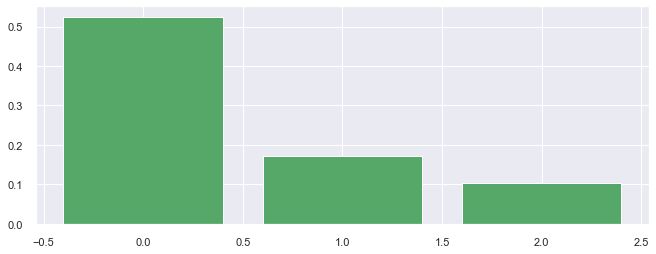

In [59]:
plt.figure(figsize=(11, 4), )
plt.bar(np.arange(num_factor_exposures), pca.explained_variance_ratio_, color='g')


# View the factor returns

<AxesSubplot:xlabel='Date'>

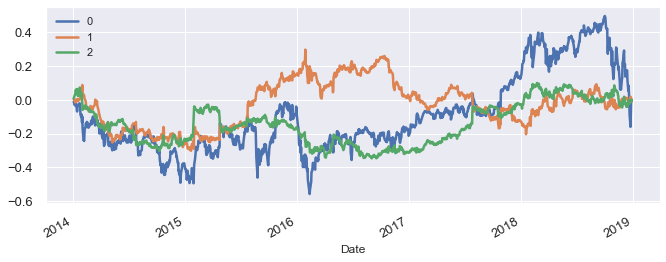

In [60]:
rm.factor_returns.cumsum().plot(figsize=(11, 4), fontsize=13, linewidth=2.5)